<a href="https://colab.research.google.com/github/evbevz/epoxy-supervisor/blob/main/Epoxy_Supervisor_Python_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
%pip install ultralytics
from ultralytics import YOLO
#ultralytics.checks()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 14.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Git Clone?

In [2]:
# Задел на будущее, чтобы потом туда выкладывать обученные модели (веса)
!git clone https://github.com/evbevz/epoxy-supervisor.git

Cloning into 'epoxy-supervisor'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 131 (delta 48), reused 7 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (131/131), 51.14 MiB | 18.89 MiB/s, done.
Resolving deltas: 100% (48/48), done.


# Predict Epoxy Level Model


0: 480x640 1 epoxy level in injector, 217.5ms
1: 480x640 1 epoxy level in injector, 217.5ms
Speed: 15.5ms preprocess, 217.5ms inference, 9.8ms postprocess per image at shape (1, 3, 480, 640)


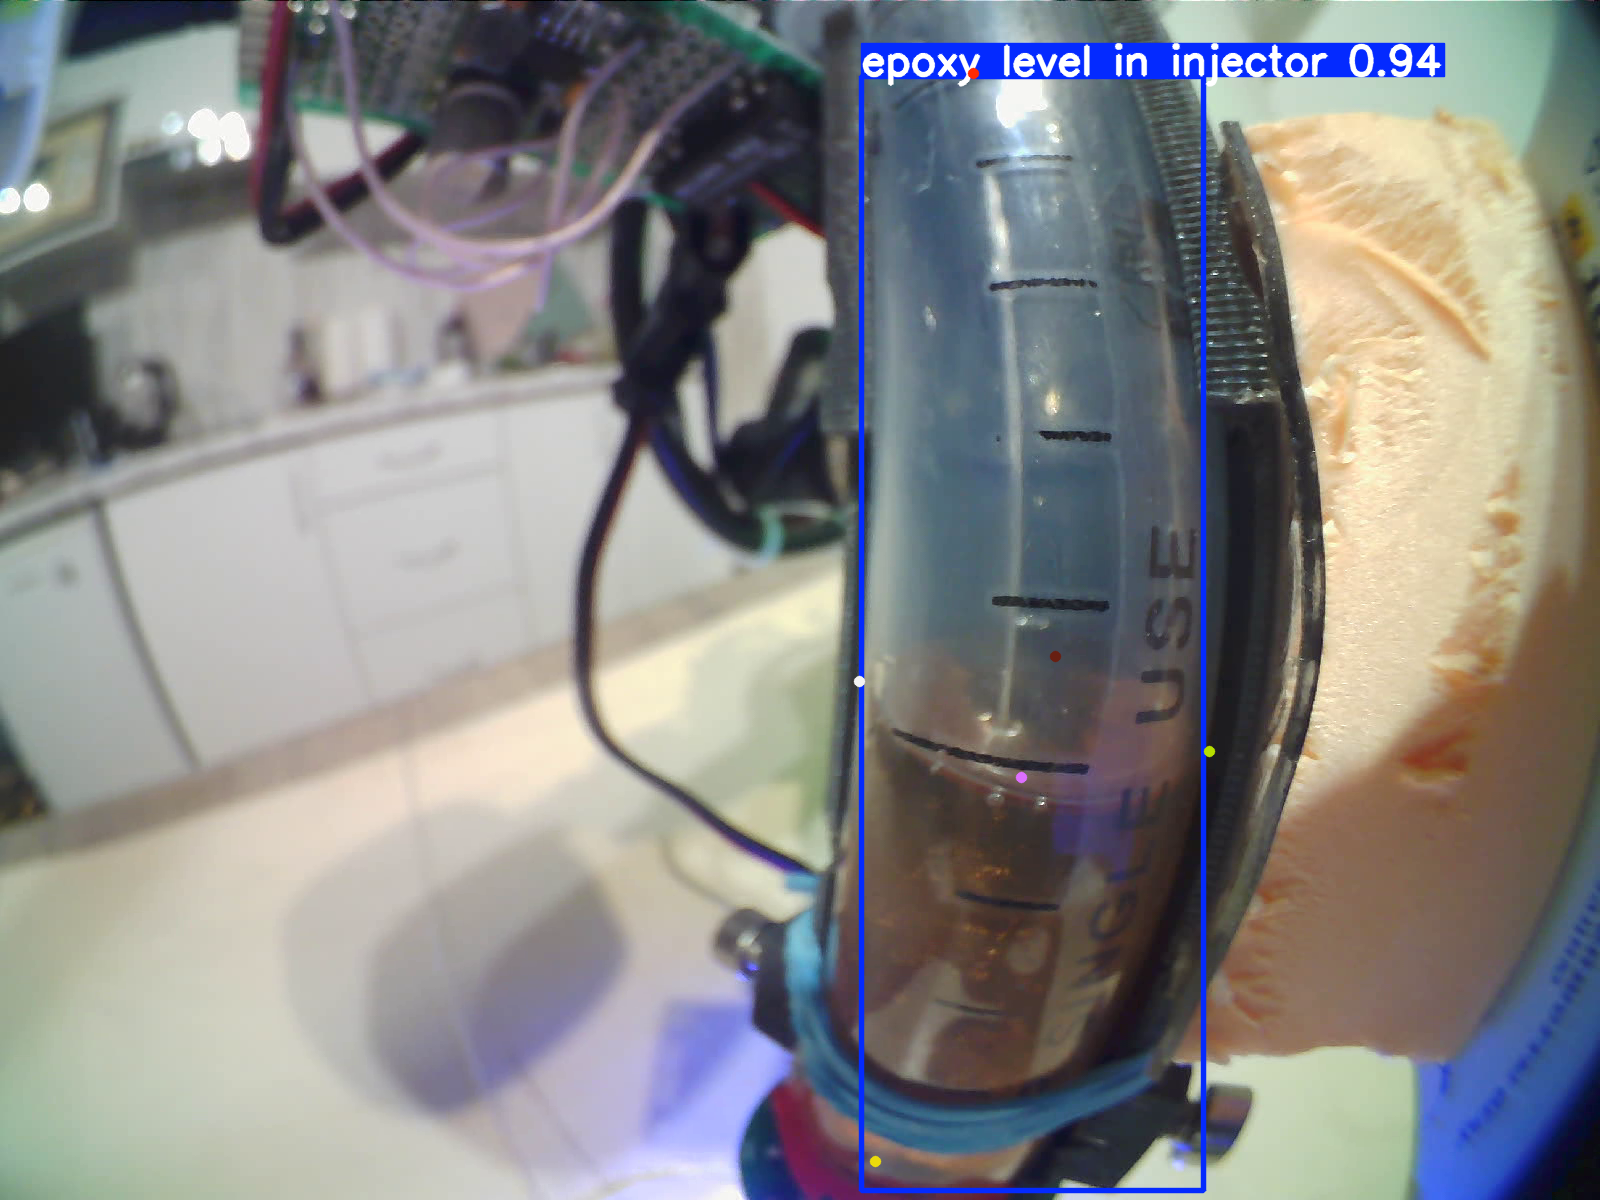

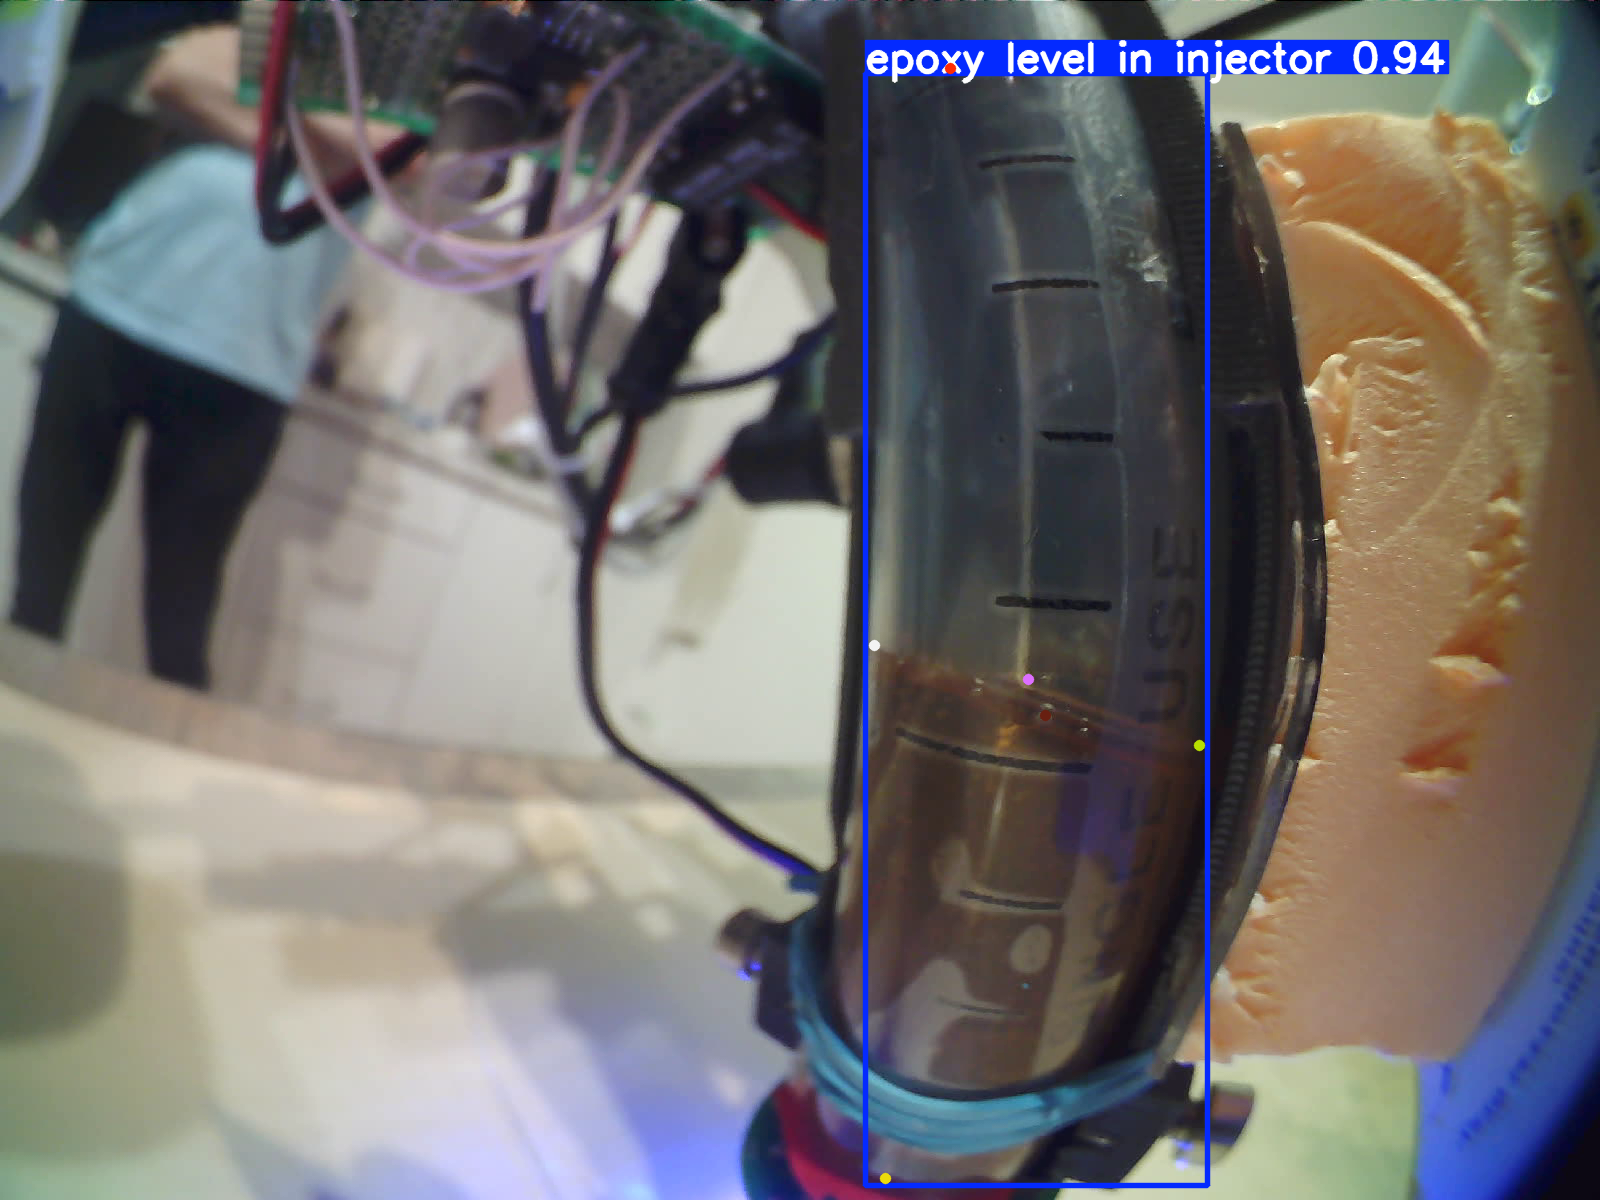

In [3]:
#@title Python Usage with image
from ultralytics import YOLO

# Load a model
model = YOLO('/content/epoxy-supervisor/weights/epoxy-supervisor.20241218.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model(['/content/epoxy-supervisor/samples/000080.png', '/content/epoxy-supervisor/samples/000090.png'])  # predict on image. return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/293) /content/epoxy-supervisor/samples/epoxy_sample.mp4: 480x640 1 epoxy level in injector, 150.2ms
video 1/1 (frame 2/293) /content/epoxy-supervisor/samples/epoxy_sample.mp4: 480x640 1 epoxy level in injector, 143.0ms
video 1/1 (frame 3/293) /content/epoxy-supervisor/samples/epoxy_sample.mp4: 480x640 1 epoxy level in injector, 154.0ms
video 1/1 (frame 4/293) /content/epoxy-supervisor/samples/epoxy_sample.mp4: 480x640 1 epoxy level i

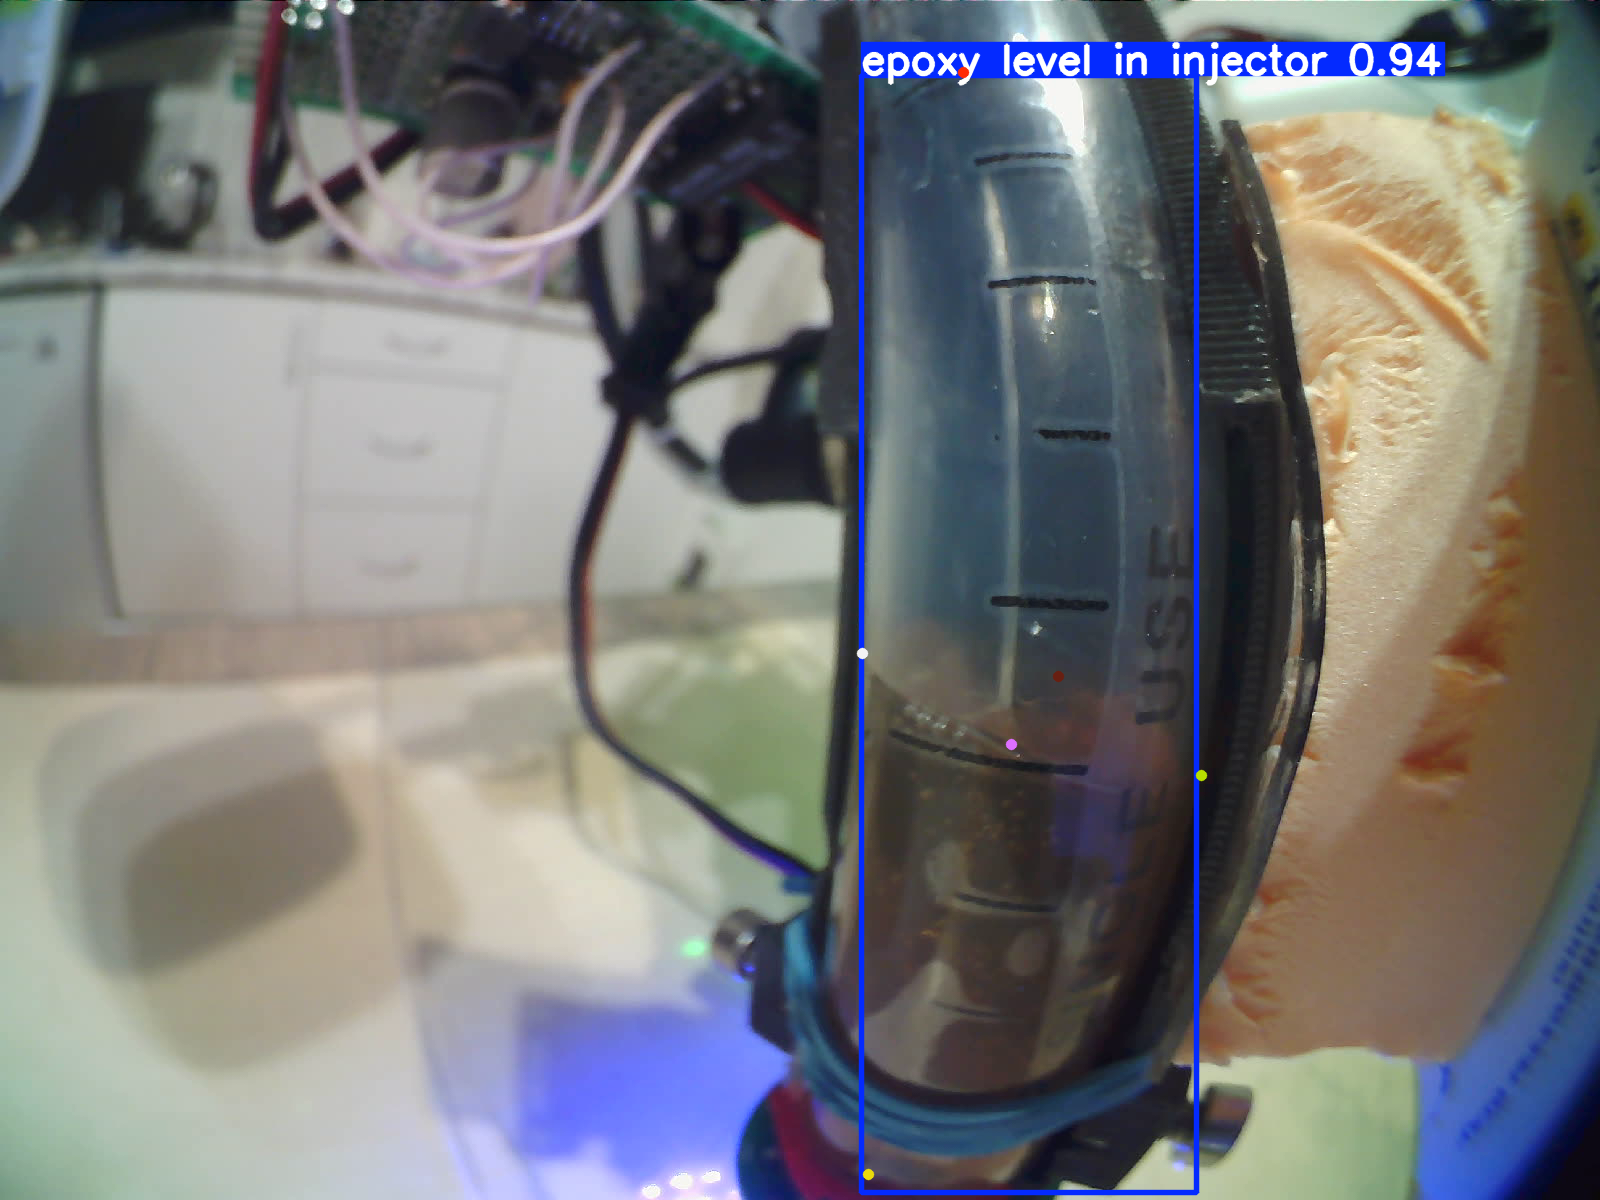

error: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:708: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'


In [5]:
#@title Python Usage with movie

# Use the model
results = model('/content/epoxy-supervisor/samples/epoxy_sample.mp4')  # predict on movie. return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.avi")  # save to disk

In [6]:
#@title Python Usage CLI with movie

!yolo predict model='/content/epoxy-supervisor/weights/epoxy-supervisor.20241218.pt' source='/content/epoxy-supervisor/samples/epoxy_sample.mp4'

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n-pose summary (fused): 257 layers, 2,664,805 parameters, 0 gradients, 6.6 GFLOPs

video 1/1 (frame 1/293) /content/epoxy-supervisor/samples/epoxy_sample.mp4: 480x640 1 epoxy level in injector, 198.3ms
video 1/1 (frame 2/293) /content/epoxy-supervisor/samples/epoxy_sample.mp4: 480x640 1 epoxy level in injector, 165.6ms
video 1/1 (frame 3/293) /content/epoxy-supervisor/samples/epoxy_sample.mp4: 480x640 1 epoxy level in injector, 156.5ms
video 1/1 (frame 4/293) /content/epoxy-supervisor/samples/epoxy_sample.mp4: 480x640 1 epoxy level in injector, 153.3ms
video 1/1 (frame 5/293) /content/epoxy-supervisor/samples/epoxy_sample.mp4: 480x640 1 epoxy level in injector, 141.6ms
video 1/1 (frame 6/293) /content/epoxy-supervisor/samples/epoxy_sample.mp4: 480x640 1 epoxy level in injector, 159.4ms
video 1/1 (frame 7/293) /content/epoxy-supervisor/samples/epoxy_sample.mp4: 480x640 1 epoxy level in injector, 174.6ms